# Machine Learning Regression for Energy efficiency 

- Name: Oscar Wang, Chengcheng Mao 
- Id: chingiw, chengchm

## Introduction
Heating load and Cooling load is a good indicator for building energy efficiency. 
In this notebook, we get the energy efficiency Data Set from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/), implement machine learning model SVC and linear regression to train our datasets. Our goal is to find a pattern between the building shapes and energy efficiency, analyze the predicted result to improve our model. 

## Dataset Description
The dataset perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


#### Continuous features
- X1	Relative Compactness 
- X2	Surface Area 
- X3	Wall Area 
- X4	Roof Area 
- X5	Overall Height 
- X6	Orientation
- X7	Glazing Area 
- X8	Glazing Area Distribution 
- y1	Heating Load 
- y2	Cooling Load


In [4]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

## Input and output preparation

First, load in the CSV file. Some of these columns are in fact integers or floats, and if you wish to run numerical functions on them (like numpy) you'll need to convert the columns to the correct type. 

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
Y2    float64
dtype: object
     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28


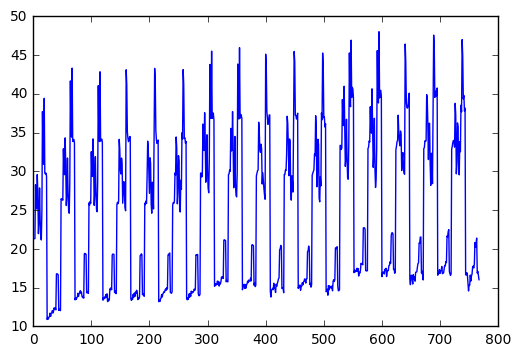

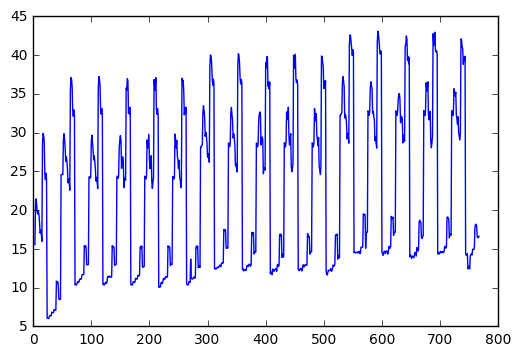

In [8]:
df = pd.read_csv('ENB2012_data.csv', na_filter=False)
df = df.drop(['Unnamed: 10','Unnamed: 11'], axis=1)
df['X1'] = pd.to_numeric(df['X1'], errors='coerce')
df['X2'] = pd.to_numeric(df['X2'], errors='coerce')
df['X3'] = pd.to_numeric(df['X3'], errors='coerce')
df['X4'] = pd.to_numeric(df['X4'], errors='coerce')
df['X5'] = pd.to_numeric(df['X5'], errors='coerce')
df['X6'] = pd.to_numeric(df['X6'], errors='coerce')
df['X7'] = pd.to_numeric(df['X7'], errors='coerce')
df['X8'] = pd.to_numeric(df['X8'], errors='coerce')
df['Y1'] = pd.to_numeric(df['Y1'], errors='coerce')
df['Y2'] = pd.to_numeric(df['Y2'], errors='coerce')

df = df.dropna()
print (df.dtypes)
print (df.head())
plt.show()
plt.plot(df.values[:,8])
plt.show()
plt.plot(df.values[:,9])
plt.close()

## Analyze the two output by ploting

In order to figure out the relation ship between two outputs. Use matlabplot to scatter plot the lable Y1 and Y2.
The result plot looks like a linear relationship. 

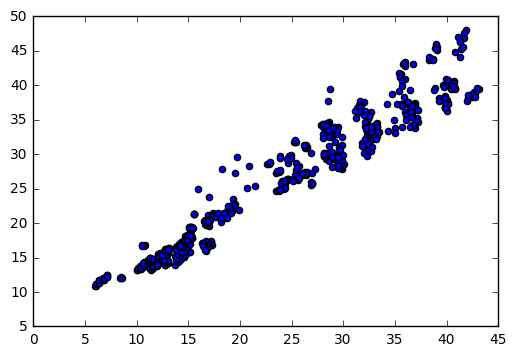

In [9]:
plt.scatter(df['Y1'], df['Y2'])
plt.show()
plt.close()

## Model selection

In this problem, we are going to use two different machine learning model to train this datasets and compare the result of it.
First, we implement the basic linear regression to this datasets. Next we implement the SVR (Support Vector Regression) to see the differece between linear regression model. Last, plot the result and compare the the true label to see whether the model assumption is robust or not.

## Support Vector Regression

The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

A (linear) support vector machine (SVM) solves the canonical machine learning optimization problem using hinge loss and linear hypothesis, plus an additional regularization term.

Unlike least squares, we solve these optimization problems by using gradient descent to update the funtion loss.




In [10]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model


## Prediction on the Heating load and Cooling load

We did a simple holdout cross-validation by seperating the dataset into training set (70%) and validation set (30%). Drop the input label from datasets and create the label vector. Here we sort the validaton set by the label value in order to analyze the result by plot and implement two different model and predict by the validation set.

In [11]:
train, test = train_test_split(df, test_size = 0.3)
X_tr = train.drop(['Y1','Y2'], axis=1)
y_tr = train['Y1']
test = test.sort_values('Y1')
X_te = test.drop(['Y1','Y2'], axis=1)
y_te = test['Y1']

reg_svr = svm.SVR()
reg_svr.fit(X_tr, y_tr)

reg_lin = linear_model.LinearRegression()
reg_lin.fit(X_tr, y_tr)

y_pre_svr = reg_svr.predict(X_te)
y_lin_svr = reg_lin.predict(X_te)
print ("Coefficient R^2 of the SVR prediction: " + str(reg_svr.score(X_tr, y_tr)))
print ("Coefficient R^2 of the Linear Regression prediction:" + str(reg_lin.score(X_tr, y_tr)))

Coefficient R^2 of the SVR prediction: 0.894107857942
Coefficient R^2 of the Linear Regression prediction:0.918293802697


## Analyze the model

The R^2 error for both model are pretty similar. The SVR model yield a better result because of lower R^2 rate. To show the difference between these two model compare with true label, we use matplotlib to plot the result of our predictions.

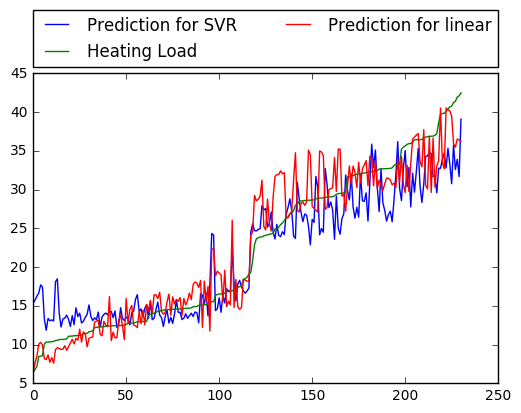

In [12]:

plt.plot(y_pre_svr, label="Prediction for SVR")
plt.plot(y_te.values, label="Heating Load")
plt.plot(y_lin_svr, label="Prediction for linear")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [13]:
train, test = train_test_split(df, test_size = 0.3)
X_tr = train.drop(['Y1','Y2'], axis=1)
y_tr = train['Y2']
test = test.sort_values('Y2')
X_te = test.drop(['Y1','Y2'], axis=1)
y_te = test['Y2']

reg_svr = svm.SVR()
reg_svr.fit(X_tr, y_tr)

reg_lin = linear_model.LinearRegression()
reg_lin.fit(X_tr, y_tr)

y_pre_svr = reg_svr.predict(X_te)
y_lin_svr = reg_lin.predict(X_te)
print ("Coefficient R^2 of the SVR prediction: " + str(reg_svr.score(X_tr, y_tr)))
print ("Coefficient R^2 of the Linear Regression prediction: " + str(reg_lin.score(X_tr, y_tr)))

Coefficient R^2 of the SVR prediction: 0.88637389422
Coefficient R^2 of the Linear Regression prediction: 0.885194083987


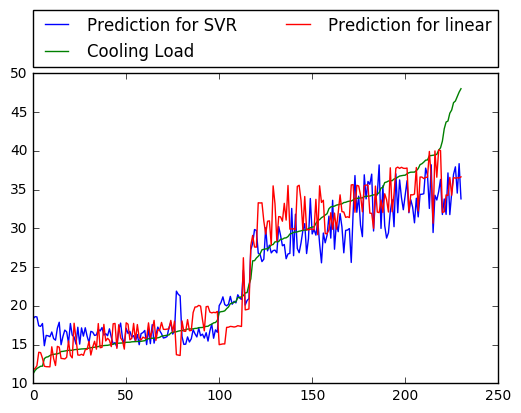

In [14]:
plt.plot(y_pre_svr, label="Prediction for SVR")
plt.plot(y_te.values, label="Cooling Load")
plt.plot(y_lin_svr, label="Prediction for linear")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [18]:
# coefficients of linear model
print (reg_lin.coef_)

[ -6.98002310e+01  -6.81438293e-02   2.60555604e-02  -4.70996949e-02
   3.98884423e+00   4.94366677e-02   1.50578572e+01  -2.25925048e-02]


## Result of the Prediction

The result for both prediction are quite good, Both of the model have the same issue that it cannot predict the high energy load very well. The reason for this might because of the problem itself is not linear, we need to implement the non-linear model to solve it better. Another reason is that the dataset it self is not big enough to yield a good result, getting more training data (like 10000 datas) will give a better result for this problem.

The coefiicients of linear model shows that the X1 and X7 features, Relative Compactness and Glazing Area are the dominate features. The more relative compactness the less energy load it has, to the glazing area on the other hand.

## Future Work

- Implemet the non-linear model for this datasets.
- Acquire more datasets for training (768 samples is not good enough for training)
- Find out which feature are dominate for this datasets (eg. X5 Overall Height)
- Get more features to train in those models.